<a href="https://colab.research.google.com/github/https-deeplearning-ai/tensorflow-1-public/blob/adding_C4/C4/W4/ungraded_labs/C4_W4_Lab_1_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Licensed under the Apache License, Version 2.0 (the "License");
# you may not use this file except in compliance with the License.
# You may obtain a copy of the License at
#
# https://www.apache.org/licenses/LICENSE-2.0
#
# Unless required by applicable law or agreed to in writing, software
# distributed under the License is distributed on an "AS IS" BASIS,
# WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied.
# See the License for the specific language governing permissions and
# limitations under the License.

**Note:** This notebook can run using TensorFlow 2.5.0

In [ ]:
#!pip install tensorflow==2.5.0

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
print(tf.__version__)

2.8.0


In [2]:
def plot_series(time, series, format="-", start=0, end=None):
    plt.plot(time[start:end], series[start:end], format)
    plt.xlabel("Time")
    plt.ylabel("Value")
    plt.grid(True)

def trend(time, slope=0):
    return slope * time

def seasonal_pattern(season_time):
    """Just an arbitrary pattern, you can change it if you wish"""
    return np.where(season_time < 0.4,
                    np.cos(season_time * 2 * np.pi),
                    1 / np.exp(3 * season_time))

def seasonality(time, period, amplitude=1, phase=0):
    """Repeats the same pattern at each period"""
    season_time = ((time + phase) % period) / period
    return amplitude * seasonal_pattern(season_time)

def noise(time, noise_level=1, seed=None):
    rnd = np.random.RandomState(seed)
    return rnd.randn(len(time)) * noise_level

time = np.arange(4 * 365 + 1, dtype="float32")
baseline = 10
series = trend(time, 0.1)  
baseline = 10
amplitude = 40
slope = 0.05
noise_level = 5

# Create the series
series = baseline + trend(time, slope) + seasonality(time, period=365, amplitude=amplitude)
# Update with noise
series += noise(time, noise_level, seed=42)

split_time = 1000
time_train = time[:split_time]
x_train = series[:split_time]
time_valid = time[split_time:]
x_valid = series[split_time:]

window_size = 20
batch_size = 32
shuffle_buffer_size = 1000

In [3]:
def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[1:]))
    return ds.batch(batch_size).prefetch(1)

In [4]:
def model_forecast(model, series, window_size):
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size))
    ds = ds.batch(32).prefetch(1)
    forecast = model.predict(ds)
    return forecast

In [5]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)

window_size = 30
train_set = windowed_dataset(x_train, window_size, batch_size=128, shuffle_buffer=shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=5,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32, return_sequences=True)),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])
lr_schedule = tf.keras.callbacks.LearningRateScheduler(
    lambda epoch: 1e-8 * 10**(epoch / 20))
optimizer = tf.keras.optimizers.SGD(learning_rate=1e-8, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(train_set, epochs=100, callbacks=[lr_schedule])

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

8/8 [==============================] - 0s 39ms/step - loss: 8.1153 - mae: 8.5996 - lr: 2.5119e-06
Epoch 50/100
8/8 [==============================] - 0s 38ms/step - loss: 7.7040 - mae: 8.1884 - lr: 2.8184e-06
Epoch 51/100
8/8 [==============================] - 0s 39ms/step - loss: 7.3262 - mae: 7.8096 - lr: 3.1623e-06
Epoch 52/100
8/8 [==============================] - 0s 39ms/step - loss: 6.9725 - mae: 7.4548 - lr: 3.5481e-06
Epoch 53/100
8/8 [==============================] - 0s 39ms/step - loss: 6.6218 - mae: 7.1033 - lr: 3.9811e-06
Epoch 54/100
8/8 [==============================] - 0s 38ms/step - loss: 6.2898 - mae: 6.7712 - lr: 4.4668e-06
Epoch 55/100
8/8 [==============================] - 0s 39ms/step - loss: 5.9775 - mae: 6.4581 - lr: 5.0119e-06
Epoch 56/100
8/8 [==============================] - 0s 39ms/step - loss: 5.7096 - mae: 6.1898 - lr: 5.6234e-06
Epoch 57/100
8/8 [==============================] - 0s 43ms/step - loss: 5.4204 - mae: 5.8992 - lr: 6.3096e-06
Epoch 58/100
8

(1e-08, 0.0001, 0.0, 30.0)

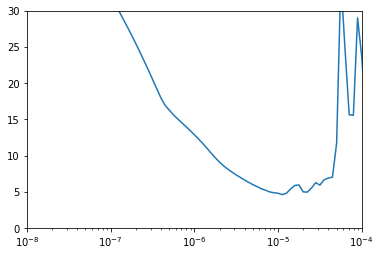

In [6]:
plt.semilogx(history.history["lr"], history.history["loss"])
plt.axis([1e-8, 1e-4, 0, 30])

In [7]:
tf.keras.backend.clear_session()
tf.random.set_seed(51)
np.random.seed(51)
#batch_size = 16
dataset = windowed_dataset(x_train, window_size, batch_size, shuffle_buffer_size)

model = tf.keras.models.Sequential([
  tf.keras.layers.Conv1D(filters=32, kernel_size=3,
                      strides=1, padding="causal",
                      activation="relu",
                      input_shape=[None, 1]),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.Dense(1),
  tf.keras.layers.Lambda(lambda x: x * 200)
])

optimizer = tf.keras.optimizers.SGD(learning_rate=1e-5, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])
history = model.fit(dataset,epochs=500)

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

31/31 [==============================] - 1s 17ms/step - loss: 4.3504 - mae: 4.8259
Epoch 59/500
31/31 [==============================] - 1s 19ms/step - loss: 4.3281 - mae: 4.8028
Epoch 60/500
31/31 [==============================] - 1s 19ms/step - loss: 4.3982 - mae: 4.8742
Epoch 61/500
31/31 [==============================] - 1s 18ms/step - loss: 4.3791 - mae: 4.8552
Epoch 62/500
31/31 [==============================] - 1s 17ms/step - loss: 4.3240 - mae: 4.7992
Epoch 63/500
31/31 [==============================] - 1s 17ms/step - loss: 4.3529 - mae: 4.8282
Epoch 64/500
31/31 [==============================] - 1s 18ms/step - loss: 4.3347 - mae: 4.8097
Epoch 65/500
31/31 [==============================] - 1s 18ms/step - loss: 4.3944 - mae: 4.8697
Epoch 66/500
31/31 [==============================] - 1s 17ms/step - loss: 4.3305 - mae: 4.8059
Epoch 67/500
31/31 [==============================] - 1s 18ms/step - loss: 4.5039 - mae: 4.9808
Epoch 68/500
31/31 [==============================] -

31/31 [==============================] - 1s 18ms/step - loss: 4.1493 - mae: 4.6218
Epoch 144/500
31/31 [==============================] - 1s 22ms/step - loss: 4.2081 - mae: 4.6820
Epoch 145/500
31/31 [==============================] - 1s 18ms/step - loss: 4.1357 - mae: 4.6086
Epoch 146/500
31/31 [==============================] - 1s 18ms/step - loss: 4.1564 - mae: 4.6306
Epoch 147/500
31/31 [==============================] - 1s 18ms/step - loss: 4.1373 - mae: 4.6104
Epoch 148/500
31/31 [==============================] - 1s 18ms/step - loss: 4.2005 - mae: 4.6746
Epoch 149/500
31/31 [==============================] - 1s 19ms/step - loss: 4.1297 - mae: 4.6031
Epoch 150/500
31/31 [==============================] - 1s 18ms/step - loss: 4.1162 - mae: 4.5888
Epoch 151/500
31/31 [==============================] - 1s 18ms/step - loss: 4.1327 - mae: 4.6058
Epoch 152/500
31/31 [==============================] - 1s 18ms/step - loss: 4.3238 - mae: 4.8000
Epoch 153/500
31/31 [=======================

31/31 [==============================] - 1s 19ms/step - loss: 4.0299 - mae: 4.5023
Epoch 228/500
31/31 [==============================] - 1s 19ms/step - loss: 4.0592 - mae: 4.5323
Epoch 229/500
31/31 [==============================] - 1s 19ms/step - loss: 4.0602 - mae: 4.5330
Epoch 230/500
31/31 [==============================] - 1s 19ms/step - loss: 4.1895 - mae: 4.6647
Epoch 231/500
31/31 [==============================] - 1s 19ms/step - loss: 4.3221 - mae: 4.7983
Epoch 232/500
31/31 [==============================] - 1s 18ms/step - loss: 4.0715 - mae: 4.5452
Epoch 233/500
31/31 [==============================] - 1s 19ms/step - loss: 4.0735 - mae: 4.5471
Epoch 234/500
31/31 [==============================] - 1s 18ms/step - loss: 4.1661 - mae: 4.6402
Epoch 235/500
31/31 [==============================] - 1s 19ms/step - loss: 4.1115 - mae: 4.5850
Epoch 236/500
31/31 [==============================] - 1s 19ms/step - loss: 4.0293 - mae: 4.5025
Epoch 237/500
31/31 [=======================

31/31 [==============================] - 1s 24ms/step - loss: 4.1212 - mae: 4.5956
Epoch 312/500
31/31 [==============================] - 1s 24ms/step - loss: 4.0757 - mae: 4.5494
Epoch 313/500
31/31 [==============================] - 1s 24ms/step - loss: 4.0493 - mae: 4.5219
Epoch 314/500
31/31 [==============================] - 1s 23ms/step - loss: 3.9955 - mae: 4.4684
Epoch 315/500
31/31 [==============================] - 1s 33ms/step - loss: 3.9906 - mae: 4.4629
Epoch 316/500
31/31 [==============================] - 1s 23ms/step - loss: 3.9785 - mae: 4.4500
Epoch 317/500
31/31 [==============================] - 1s 22ms/step - loss: 4.0368 - mae: 4.5092
Epoch 318/500
31/31 [==============================] - 1s 26ms/step - loss: 4.0312 - mae: 4.5036
Epoch 319/500
31/31 [==============================] - 1s 22ms/step - loss: 3.9802 - mae: 4.4521
Epoch 320/500
31/31 [==============================] - 1s 21ms/step - loss: 4.0019 - mae: 4.4742
Epoch 321/500
31/31 [=======================

31/31 [==============================] - 1s 26ms/step - loss: 3.9488 - mae: 4.4201
Epoch 396/500
31/31 [==============================] - 1s 23ms/step - loss: 4.0843 - mae: 4.5588
Epoch 397/500
31/31 [==============================] - 1s 22ms/step - loss: 3.9867 - mae: 4.4593
Epoch 398/500
31/31 [==============================] - 1s 21ms/step - loss: 4.1682 - mae: 4.6427
Epoch 399/500
31/31 [==============================] - 1s 22ms/step - loss: 3.9793 - mae: 4.4511
Epoch 400/500
31/31 [==============================] - 1s 23ms/step - loss: 4.0187 - mae: 4.4918
Epoch 401/500
31/31 [==============================] - 1s 22ms/step - loss: 3.9973 - mae: 4.4701
Epoch 402/500
31/31 [==============================] - 1s 22ms/step - loss: 3.9848 - mae: 4.4582
Epoch 403/500
31/31 [==============================] - 1s 21ms/step - loss: 3.9848 - mae: 4.4576
Epoch 404/500
31/31 [==============================] - 1s 23ms/step - loss: 3.9560 - mae: 4.4279
Epoch 405/500
31/31 [=======================

31/31 [==============================] - 1s 21ms/step - loss: 3.9964 - mae: 4.4690
Epoch 480/500
31/31 [==============================] - 1s 23ms/step - loss: 3.9877 - mae: 4.4600
Epoch 481/500
31/31 [==============================] - 1s 21ms/step - loss: 3.9945 - mae: 4.4670
Epoch 482/500
31/31 [==============================] - 1s 23ms/step - loss: 3.9465 - mae: 4.4177
Epoch 483/500
31/31 [==============================] - 1s 22ms/step - loss: 3.9384 - mae: 4.4094
Epoch 484/500
31/31 [==============================] - 1s 22ms/step - loss: 3.9261 - mae: 4.3972
Epoch 485/500
31/31 [==============================] - 1s 21ms/step - loss: 3.9489 - mae: 4.4214
Epoch 486/500
31/31 [==============================] - 1s 20ms/step - loss: 4.0022 - mae: 4.4748
Epoch 487/500
31/31 [==============================] - 1s 21ms/step - loss: 3.9495 - mae: 4.4211
Epoch 488/500
31/31 [==============================] - 1s 20ms/step - loss: 3.9334 - mae: 4.4050
Epoch 489/500
31/31 [=======================

In [8]:
rnn_forecast = model_forecast(model, series[..., np.newaxis], window_size)
rnn_forecast = rnn_forecast[split_time - window_size:-1, -1, 0]

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set

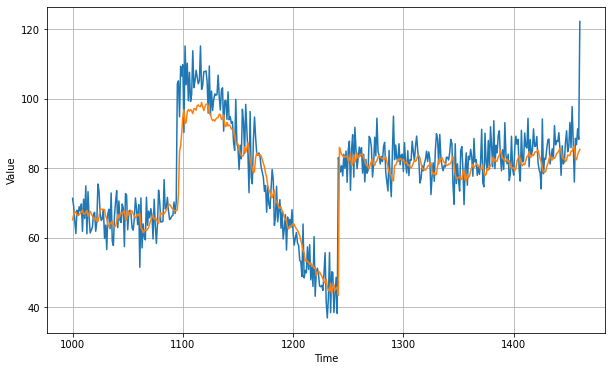

In [9]:
plt.figure(figsize=(10, 6))
plot_series(time_valid, x_valid)
plot_series(time_valid, rnn_forecast)

In [10]:
tf.keras.metrics.mean_absolute_error(x_valid, rnn_forecast).numpy()

5.11832

<Figure size 432x288 with 0 Axes>

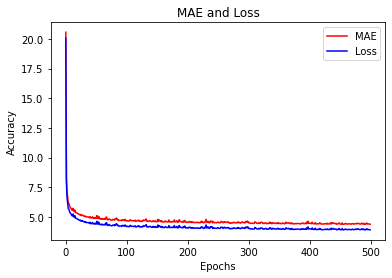

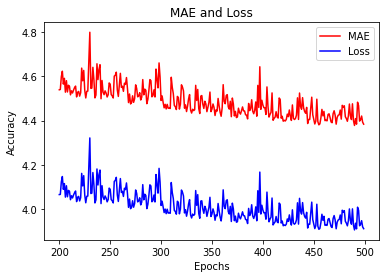

<Figure size 432x288 with 0 Axes>

In [11]:
import matplotlib.image  as mpimg
import matplotlib.pyplot as plt

#-----------------------------------------------------------
# Retrieve a list of list results on training and test data
# sets for each training epoch
#-----------------------------------------------------------
mae=history.history['mae']
loss=history.history['loss']

epochs=range(len(loss)) # Get number of epochs

#------------------------------------------------
# Plot MAE and Loss
#------------------------------------------------
plt.plot(epochs, mae, 'r')
plt.plot(epochs, loss, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()

epochs_zoom = epochs[200:]
mae_zoom = mae[200:]
loss_zoom = loss[200:]

#------------------------------------------------
# Plot Zoomed MAE and Loss
#------------------------------------------------
plt.plot(epochs_zoom, mae_zoom, 'r')
plt.plot(epochs_zoom, loss_zoom, 'b')
plt.title('MAE and Loss')
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["MAE", "Loss"])

plt.figure()